### Using 4 features classify flowers into categories: iris setosa, versicolor, virginica 

In [2]:
import pandas as pd
import numpy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

In [3]:
iris=pd.read_csv('Iris.csv')

### Understanding the data

In [4]:
iris.info()    #checking if there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.shape

(150, 6)

In [6]:
df=iris
iris_new = df.drop(['Id'], axis=1)
print(iris_new)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [7]:
print(iris_new.head(5))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [8]:
#flower distribution 
iris_new["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
print(iris_new.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [10]:
 print(iris_new.groupby('Species').size())   
# view how many instances the data frame contains.

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


let us see how are the length and width are distributed

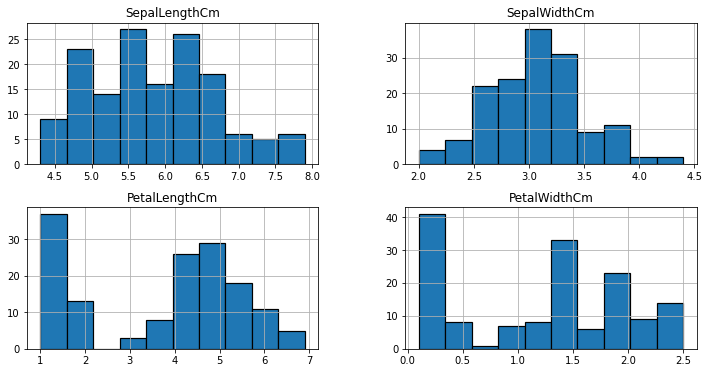

In [11]:
iris_new.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

## Data Visualizing

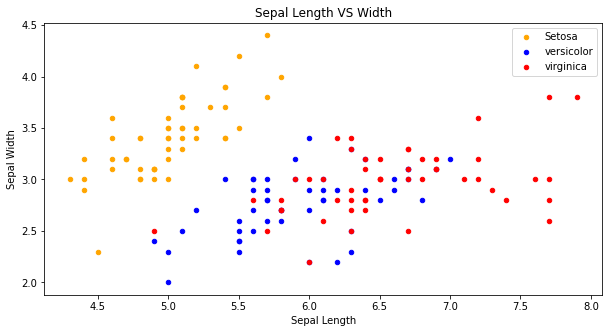

In [12]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='virginica', ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")

fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

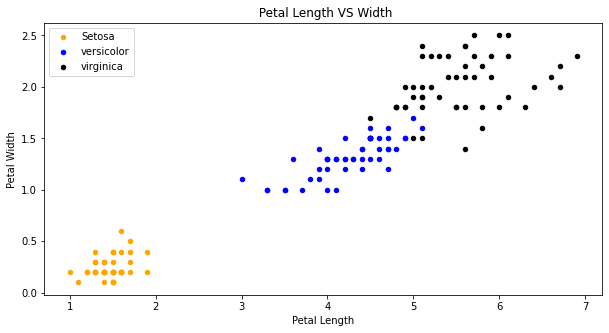

In [13]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='black', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


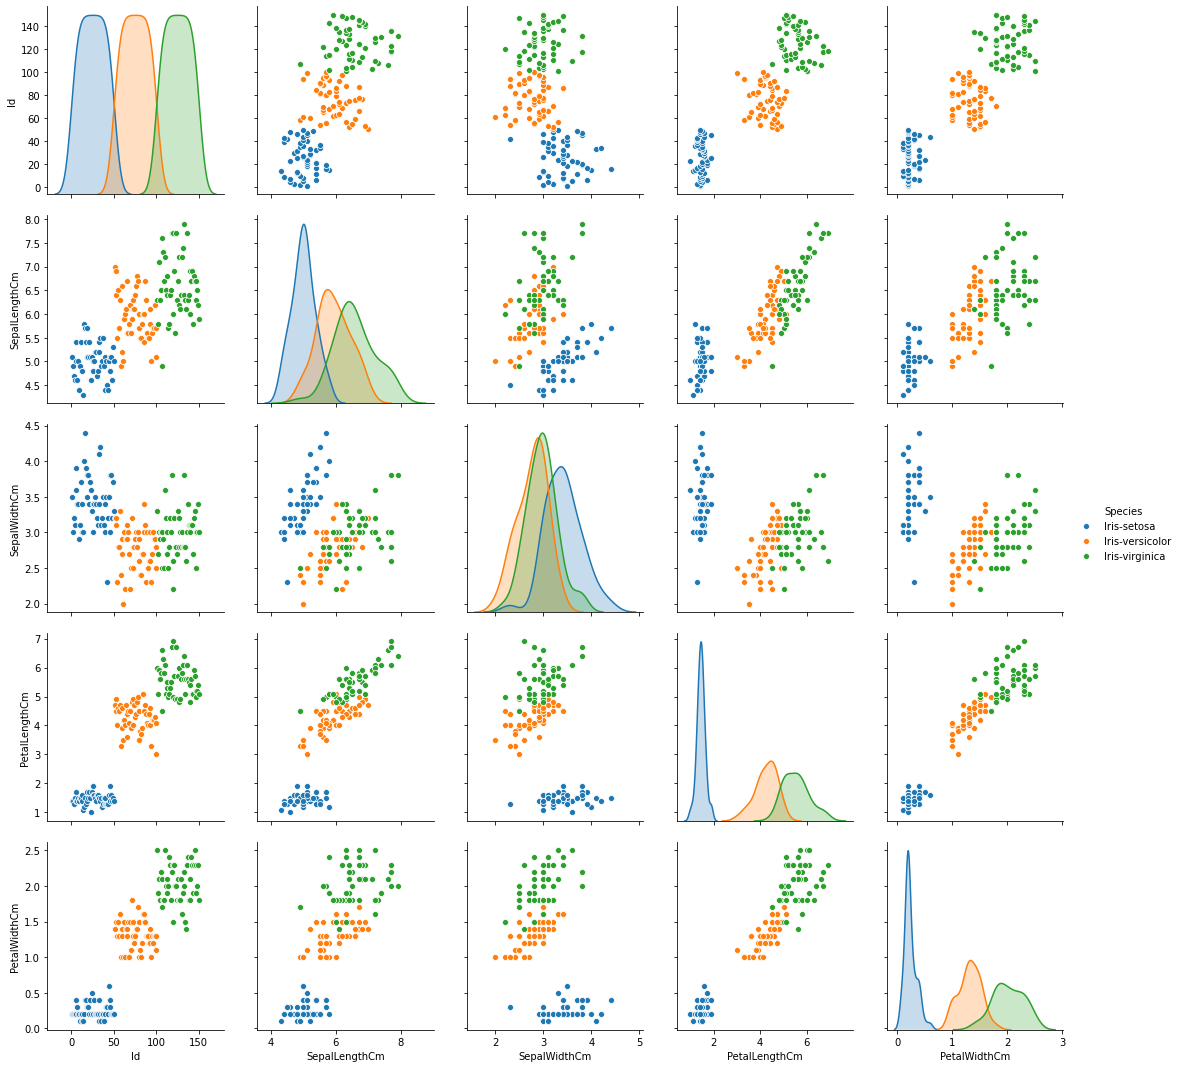

In [14]:
sns.pairplot(df, hue='Species', size=3)

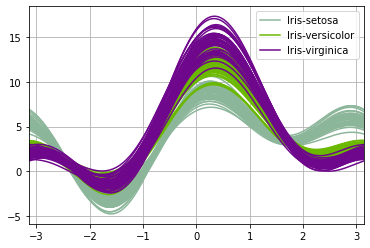

In [15]:
x = pd.plotting.andrews_curves(iris_new, 'Species')
  
# ploting the Curve
x.plot()
  
# Display
plt.show()

Now, when we train any algorithm, the number of features and their correlation plays an important role.
If there are features and many of the features are highly correlated, then training an algorithm with all the featues
will reduce the accuracy. 
Thus features selection should be done carefully. 
This dataset has less featues but still we will see the correlation.

#### Correlation Matrix-

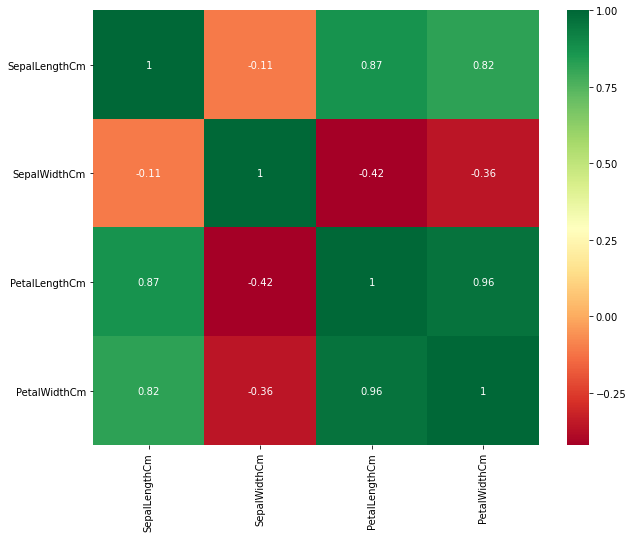

In [16]:
sns.heatmap(iris_new[iris_new.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Machine Learning

### Steps To Be followed When Applying an Algorithm:
#### 1.Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
#### 2.Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
#### 3.Then pass the training dataset to the algorithm to train it. We use the .fit() method
#### 4.Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
#### 5.We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [17]:
iris_new.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_new[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], iris_new.Species, test_size = 0.3)
# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%

In [19]:
X_train.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
93,5.0,2.3,3.3,1.0
122,7.7,2.8,6.7,2.0
45,4.8,3.0,1.4,0.3


In [20]:
y_train.head(3)

93     Iris-versicolor
122     Iris-virginica
45         Iris-setosa
Name: Species, dtype: object

In [21]:
X_test.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
106,4.9,2.5,4.5,1.7
55,5.7,2.8,4.5,1.3
128,6.4,2.8,5.6,2.1


In [22]:
y_test.head(3)

106     Iris-virginica
55     Iris-versicolor
128     Iris-virginica
Name: Species, dtype: object

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier

#### Support Vector Machine (SVM)

In [24]:
model = svm.SVC() #select the algorithm
model.fit(X_train, y_train) # we train the algorithm with the training data and the training output
prediction = model.predict(X_test) #now we pass the testing data to the trained algorithm
# print(prediction)
print("accuracy=", model.score(X_test, y_test))

accuracy= 0.9333333333333333


#### Decision Tree

In [25]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
prediction=dt_model.predict(X_test) 
# print(prediction)
print("accuracy=", dt_model.score(X_test, y_test))

accuracy= 0.9333333333333333


#### Logistic Regression

In [28]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(X_test)
print(prediction)
print("accuracy = ", lr_model.score(X_test, y_test))

['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']
accuracy =  0.9111111111111111


In [36]:
print(X_test.shape)
print(y_test.shape)

(45, 4)
(45,)


In [37]:
print(len(prediction))

45


### We can predict category by using only 2 features also 

### petal:  'PetalLengthCm','PetalWidthCm'

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris_new[['PetalLengthCm','PetalWidthCm']], iris_new.Species, test_size = 0.3)


In [40]:
X_test.head(3)

,PetalLengthCm,PetalWidthCm
27,1.5,0.2
7,1.5,0.2
126,4.8,1.8


In [45]:
petalmodel = LogisticRegression()
petalmodel.fit(X_train, y_train)
prediction = petalmodel.predict(X_test)
accuracy = petalmodel.score(X_test, y_test)
accuracy

0.9555555555555556

### sepal:  'SepalLengthCm','SepalWidthCm'

In [46]:
X_train, X_test, y_train, y_test = train_test_split(iris_new[['SepalLengthCm','SepalWidthCm']], iris_new.Species, test_size = 0.3)


In [48]:
X_test.head(3)

,SepalLengthCm,SepalWidthCm
148,6.2,3.4
28,5.2,3.4
146,6.3,2.5


In [52]:
sepalmodel = LogisticRegression()
sepalmodel.fit(X_train, y_train)
prediction = sepalmodel.predict(X_test)
accuracy = sepalmodel.score(X_test, y_test)
accuracy

0.7555555555555555

### Accuracy for petal is more than sepal.